# Introduction

Colorado has 58 mountains over 14,000 feet in elevation throughout the state. In order for a mountain to be classified as a 14er, though, it be at least 300 feet higher than the saddle that connecting it to a neighboring peak. This leaves 53 total 14ers to tackle. For many Coloradoans, it is a goal to summit all 58 peaks. This notebook aims to use Ridgeline Plots (which beautifully resemble Colorado's beautiful 14ers) to get basic insights into these challenging mountains.


## Classes 

14ers have different classes assigned to them. Below is the class difficulty definitions given by 14ers.com:

14er routes have been assigned a difficulty rating using the Yosemite Decimal System (YDS), which has been in use in the United States for over 75 years. The system uses "classes" ranging from 1 (easiest) to 5 (most difficult).

#### Class 1
Easy hiking - usually on a good trail.
#### Class 2
More difficult hiking that may be off-trail. You may also have to put your hands down occasionally to keep your balance. May include easy snow climbs or hiking on talus/scree. Class 2 includes a wide range of hiking and a route may have exposure, loose rock, steep scree, etc.

#### Class 3
Scrambling or un-roped climbing. You must use your hands most of the time to hold the terrain or find your route. This may be caused by a combination of steepness and extreme terrain (large rocks or steep snow).

#### Class 4
Climbing. Handholds and footholds are required for upward or downward progress. Rope is sometimes used on Class 4 routes because falls can be fatal. The terrain is often steep and dangerous.

#### Class 5
Technical climbing. The climbing involves the use of rope and belaying. Rock climbing is Class 5. Note: In the 1950s, the Class 5 portion of this ranking system was expanded to include a decimal at the end of the ranking to further define the difficulties of rock climbing. This is called the Yosemite Decimal System (YDS). The decimal notations range from 5.1 (easiest) to 5.14 (most difficult). Recently, the rankings of 5.10 through 5.14 were expanded to include an "a", "b", "c" or "d" after the decimal (Example: 5.12a) to provide further details of the ranking. None of the routes described on 14ers.com are Class 5, so I will not go into detail of the expanded decimal system.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file


mountain_data = df = pd.read_excel(r"C:\Users\Hatteras\Documents\Kaggle Datasets\Copy of 14er.xlsx") 

profile = ProfileReport(mountain_data, title="Pandas Profiling Report")
profile


Looking at the Pandas Profile, we can see a few key things about our data
 - 14ers are classified into which mountain range they belong to and their difficulty
 - Location is given by longitude and latitude
 - We can see numerical statistics for each peak such as elevation in feet, route distance in miles, and elevation gain in feet
 - Traffic on routes are given by low and high ranges of estimated visits from 2017
    

Now that we have our data ready to go, let's look at the distributions of route distance by class of 14er

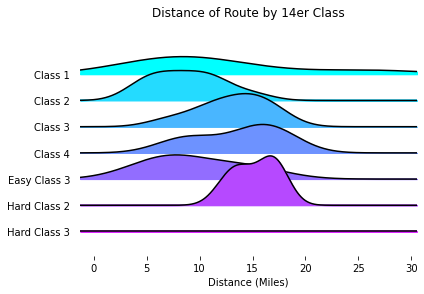

In [3]:
import joypy
from matplotlib import cm

fig, axes = joypy.joyplot(mountain_data[['Distance_mi','Difficulty']], by="Difficulty", colormap=cm.cool, title = "Distance of Route by 14er Class")
plt.xlabel('Distance (Miles)')
plt.savefig('14er.jpeg', bbox_inches='tight')


From this visual, we can see that as the class gets harder, the median route distance tends to increase. 

Let's take a look at some of the attributes of the different mountain ranges

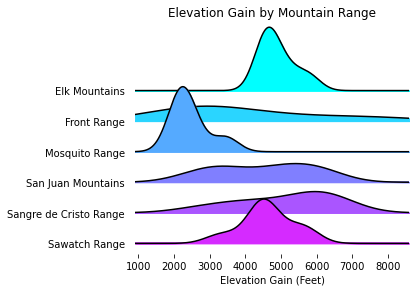

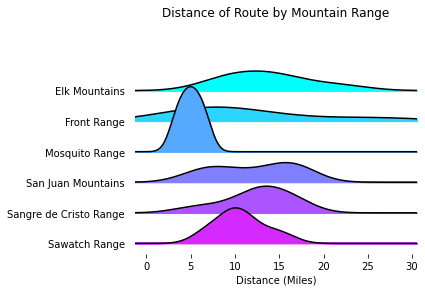

In [14]:
fig, axes = joypy.joyplot(mountain_data[['Mountain Range','Elevation Gain_ft']], by="Mountain Range"
                          ,colormap=cm.cool, title = "Elevation Gain by Mountain Range")
plt.xlabel('Elevation Gain (Feet)')
plt.savefig('14er.jpeg', bbox_inches='tight')

fig, axes = joypy.joyplot(mountain_data[['Mountain Range','Distance_mi']], by="Mountain Range"
                          ,colormap=cm.cool, title = "Distance of Route by Mountain Range")
plt.xlabel('Distance (Miles)')
plt.savefig('14er.jpeg', bbox_inches='tight')

From this we can tell a couple different things about the mountain ranges.

 - Most of the 14ers in the Mosquito Range tend to have a route distance of about 5 miles and elevation gain of a little over 2000 feet
 - The Elk Mountains 14ers tend to have an elevation gain of about 5000 feet and varying route distance
 - The Sawatch Range 14ers tend to have a route distance between 5 and 15 miles
 - The other mountain ranges have a more spread out distribution of elevation gain and route distance

# Conclusion

Ridgeline Plots are great for answering the questions above, but there are other questions about our data that this visualizaiton will not help us answer. These questions include
 - How does the mountain range impact traffic?
 - Are more difficult 14ers less trafficked? 
 
For example, let's see what happens when we try to visual the first question with the Ridgeline Plot

C:\Users\Hatteras\anaconda3\lib\site-packages\joypy\joyplot.py:268: UserWarning: The data contains a group with a single distinct value (3000) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
C:\Users\Hatteras\anaconda3\lib\site-packages\joypy\joyplot.py:268: UserWarning: The data contains a group with a single distinct value (3000) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "


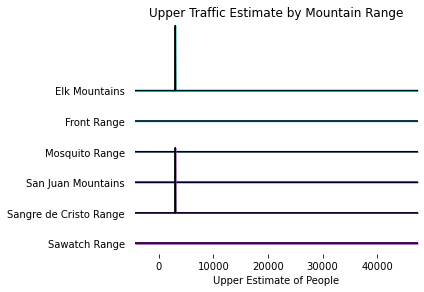

In [10]:
fig, axes = joypy.joyplot(mountain_data[['Mountain Range','Traffic High']], by="Mountain Range"
                          ,colormap=cm.cool, title = "Upper Traffic Estimate by Mountain Range")
plt.xlabel('Upper Estimate of People')
plt.savefig('14er.jpeg', bbox_inches='tight')

As we can see, a Ridgeline Plot is not the best way to answer this question. We can try answer the above questions with other visuals in further notebooks. 